In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dataset_generator import get_regression_bunch
from code_metric import CodeMetric

## Datasets 

In [60]:
# Load the Boston Housing dataset
code_metrics = get_regression_bunch()

print(f"Keys of code metrics  Dataset: {code_metrics.keys()}")
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(code_metrics.data, code_metrics.target, test_size=0.2, random_state=12345)

Keys of code metrics  Dataset: dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [61]:
code_metrics.target

array([4.22222222, 3.55555556, 3.55555556, 4.33333333, 4.        ,
       4.55555556, 3.        , 3.11111111, 3.77777778, 3.22222222,
       4.        , 3.33333333, 3.55555556, 3.55555556, 2.66666667,
       4.44444444, 3.66666667, 4.        , 4.        , 3.88888889,
       4.        , 4.55555556, 3.22222222, 3.66666667, 4.22222222,
       3.22222222, 3.77777778, 2.33333333, 3.66666667, 3.44444444,
       3.22222222, 4.33333333, 4.        , 2.55555556, 4.22222222,
       2.22222222, 3.77777778, 4.22222222, 4.77777778, 4.22222222,
       4.11111111, 4.66666667, 2.88888889, 4.        , 4.33333333,
       3.33333333, 3.66666667, 4.11111111, 2.77777778, 3.11111111,
       3.44444444, 4.        , 4.22222222, 4.11111111, 4.22222222,
       3.33333333, 3.55555556, 3.55555556, 3.77777778, 3.88888889,
       3.88888889, 3.33333333, 4.        , 3.88888889, 4.55555556,
       3.44444444, 4.66666667, 2.88888889, 3.        , 3.22222222,
       3.55555556, 3.22222222, 4.55555556, 1.88888889, 3.88888

In [62]:
code_metrics.feature_names

array(['NUMBER_OF_LINES', 'NUMBER_OF_LOOPS', 'LINE_LENGTH_MEAN',
       'COMMENTS_PER_CODE_LINE', 'PROPORTION_OF_BLANK_LINES',
       'PROPORTION_OF_GOOD_INDENTATION',
       'MAX_STREAK_OF_OPENING_PARENTHESIS',
       'MAX_STREAK_OF_FOLLOWING_PERIODS', 'LINE_LENGTH_MAX'], dtype='<U33')

# Training models

## Decision Tree 


In [63]:
# Decision Tree Regressor
reg_dt = DecisionTreeRegressor(random_state=12345)
reg_dt.fit(X_train, y_train)
y_pred_dt = reg_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Perform cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
cv_scores_dt = cross_val_score(reg_dt, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Calculate the mean squared error
mse = np.mean(cv_scores_dt)

# Print the results
print("Decision Tree cross-validation mean squared error: {:.3f}".format(mse))
print("Decision Tree Regressor MSE: {:.3f}".format(mse_dt))
print(cv_scores_dt)

Decision Tree cross-validation mean squared error: -0.435
Decision Tree Regressor MSE: 0.441
[-0.35653925 -0.35377823 -0.26841534 -0.53961692 -0.49559087 -0.40865191
 -0.46170976 -0.48087757 -0.59914333 -0.38374177]


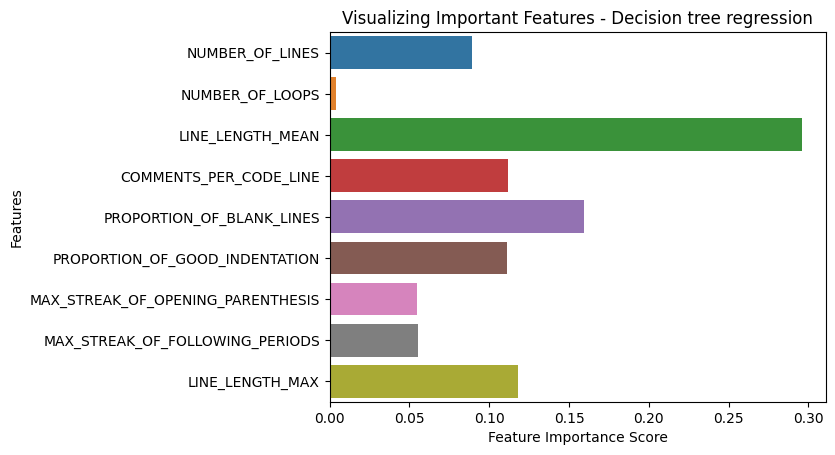

In [73]:
importance_DT = reg_dt.feature_importances_
# Create a barplot of feature importances
sns.barplot(x=importance_DT, y=code_metrics.feature_names)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features - Decision tree regression")
plt.show()

## Random Forest 

In [65]:
# Random Forest Regressor
reg_rf = RandomForestRegressor(n_estimators=100, random_state=12345)
reg_rf.fit(X_train, y_train)
y_pred_rf = reg_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Perform cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
cv_scores_rf = cross_val_score(reg_rf, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Calculate the mean squared error
mse = -np.mean(cv_scores_rf)

# Print the results
print("Random Forest cross-validation mean squared error: {:.3f}".format(mse))
print("Random Forest Regressor MSE: {:.3f}".format(mse_rf))
print(cv_scores_rf)

Random Forest cross-validation mean squared error: 0.235
Random Forest Regressor MSE: 0.220
[-0.26453516 -0.26856583 -0.16053228 -0.25687683 -0.25509139 -0.17408874
 -0.25870682 -0.27157443 -0.25317519 -0.18430566]


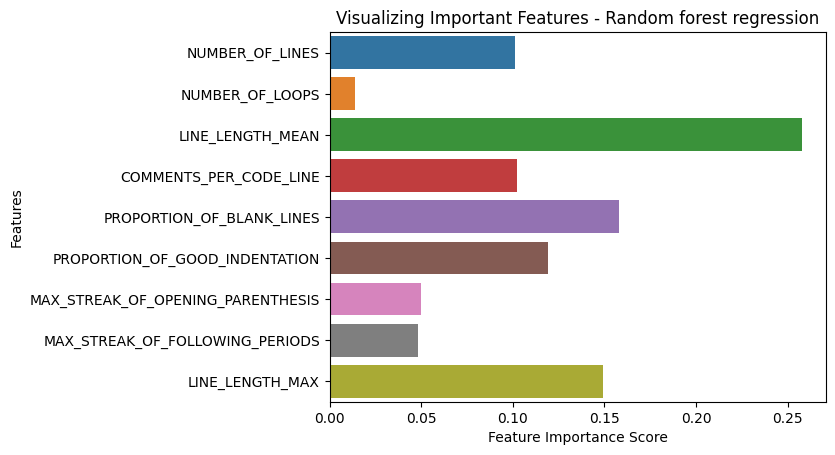

In [74]:
importance_RF = reg_rf.feature_importances_
# Create a barplot of feature importances
sns.barplot(x=importance_RF, y=code_metrics.feature_names)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features - Random forest regression")
plt.show()

## Linear Regression

In [67]:
# Initialize the model
reg_lr = LinearRegression()

# Fit the model
reg_lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = reg_lr.predict(X_test)

# Calculate the mean squared error
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Perform cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
cv_scores_lr = cross_val_score(reg_lr, X_train, y_train, cv=kfold, scoring= 'neg_mean_squared_error')

# Calculate the mean squared error
mse = -np.mean(cv_scores_lr)

# Print the results
print("Linear Regression cross-validation mean squared error: {:.3f}".format(mse))
print("Linear Regression mean squared error: {:.3f}".format(mse_lr))


Linear Regression cross-validation mean squared error: 0.312
Linear Regression mean squared error: 0.285


## Ridge regression 

In [68]:
# Import the necessary libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Initialize the model
reg_ridge = Ridge(alpha=1.0)

# Fit the model
reg_ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = reg_ridge.predict(X_test)

# Calculate the mean squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Perform cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
cv_scores_ridge = cross_val_score(reg_ridge, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Calculate the mean squared error
mse = -np.mean(cv_scores_ridge)

# Print the results
print("Ridge Regression cross-validation mean squared error: {:.3f}".format(mse))
print("Ridge Regression mean squared error: {:.3f}".format(mse_ridge))

Ridge Regression cross-validation mean squared error: 0.312
Ridge Regression mean squared error: 0.285


## Neural networks 

In [69]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_shape=X_train.shape[1:], activation="relu"))
    Dropout(0.5)
    model.add(Dense(16, activation="relu"))
    Dropout(0.5)
    model.add(Dense(32, activation="relu"))
    Dropout(0.5)
    model.add(Dense(32, activation="relu"))
    Dropout(0.5)
    model.add(Dense(16, activation="relu"))
    Dropout(0.5)
    model.add(Dense(1))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

# Create the KerasRegressor object
keras_reg = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Perform cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
cv_scores_nn = cross_val_score(keras_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Calculate the mean squared error
mse = -np.mean(cv_scores_nn)

# Print the result
print("Neural Network cross-validation mean squared error: {:.3f}".format(mse))

# Train the model
history = keras_reg.fit(X_train, y_train, epochs=10, batch_size=32, )

# Evaluate the model
loss = -keras_reg.score(X_test, y_test)
print("Test loss:", loss)


C:\Users\steve\AppData\Local\Temp\ipykernel_16536\1754736232.py:31: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Neural Network cross-validation mean squared error: 0.605
Test loss: 0.7166876196861267


# Comparing models after cross-validation 

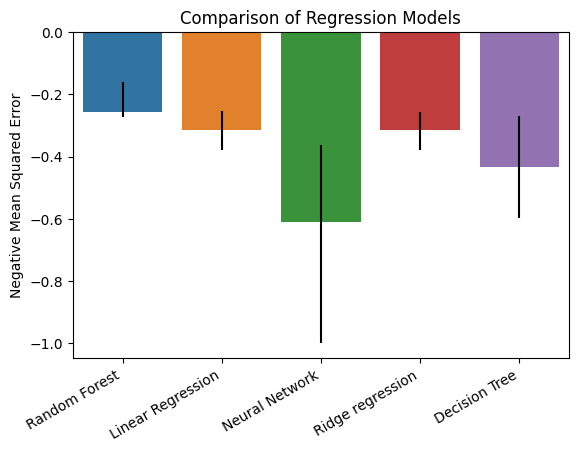

In [70]:
# on calcule le mean , max , min pour chaque cv_score
dt_median = np.median(cv_scores_dt)
dt_min = np.min(cv_scores_dt)
dt_max = np.max(cv_scores_dt)

rf_median = np.median(cv_scores_rf)
rf_min = np.min(cv_scores_rf)
rf_max = np.max(cv_scores_rf)


lin_median = np.median(cv_scores_lr)
lin_min = np.min(cv_scores_lr)
lin_max = np.max(cv_scores_lr)

nn_median = np.median(cv_scores_nn)
nn_min = np.min(cv_scores_nn)
nn_max = np.max(cv_scores_nn)

rr_median = np.median(cv_scores_ridge)
rr_min = np.min(cv_scores_ridge)
rr_max = np.max(cv_scores_ridge)

# create a barplot of the results
fig = plt.figure()
sns.barplot(
    x=['Random Forest', 'Linear Regression', 'Neural Network', 'Ridge regression','Decision Tree'],
    y=[rf_median, lin_median, nn_median, rr_median ,  dt_median],
    yerr=np.array([        [rf_median - rf_min, lin_median - lin_min, nn_median - nn_min, rr_median - rr_min, dt_median-dt_min],
        [rf_max - rf_median, lin_max - lin_median, nn_max - nn_median, rr_max - rr_median , dt_max - dt_median ]
    ]),
    capsize=10
)
fig.autofmt_xdate()
plt.title('Comparison of Regression Models')
plt.ylabel('Negative Mean Squared Error')
plt.show()


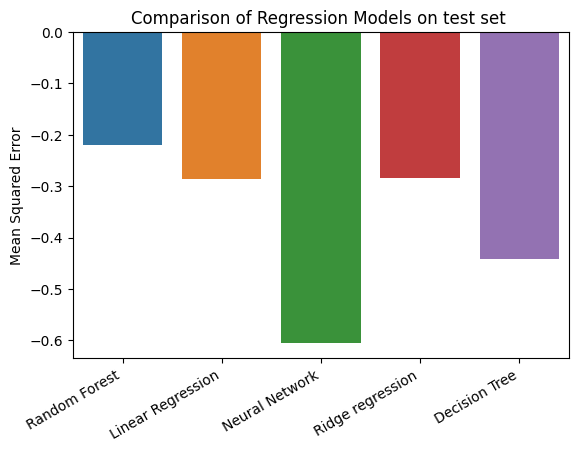

In [72]:
fig = plt.figure()
sns.barplot(x=['Random Forest', 'Linear Regression', 'Neural Network', 'Ridge regression','Decision Tree'],
            y = [-mse_rf, -mse_lr , -mse , -mse_ridge , -mse_dt],
              capsize=10
)
fig.autofmt_xdate()
plt.title('Comparison of Regression Models on test set ')
plt.ylabel('Mean Squared Error')
plt.show()